In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [161]:
import os

from scipy.io import loadmat
import pandas as pd

# mat2json PaperDoll

In [162]:
mat_file = './data/paperdoll_dataset.mat'
#f = h5py.File(mat_file, 'r')
f = loadmat(mat_file)
labels = f['labels'][0]
samples = f['samples'][0]

In [165]:
sr_ctg = pd.Series([label[0] for label in labels])
sr_ctg.index = sr_ctg.index+1
df_ctg = sr_ctg.reset_index()
df_ctg.columns = ['category_id', 'category']
df_ctg

# save
#out_file = './test_label/categories.tsv'
#out_dir = os.path.dirname(out_file)
#if not os.path.isdir(out_dir):
#    os.makedirs(out_dir)
#df_ctg.to_csv(out_file, index=False, sep='\t')

,category_id,category
0,1,accessories
1,2,bag
2,3,belt
3,4,blazer
4,5,blouse
5,6,bodysuit
6,7,boots
7,8,bra
8,9,bracelet
9,10,cape


In [151]:
sample = samples[0]
len(sample)

4

10

'http://images1.chictopia.com/photos/homme/5747766283/5747766283_400.jpg'

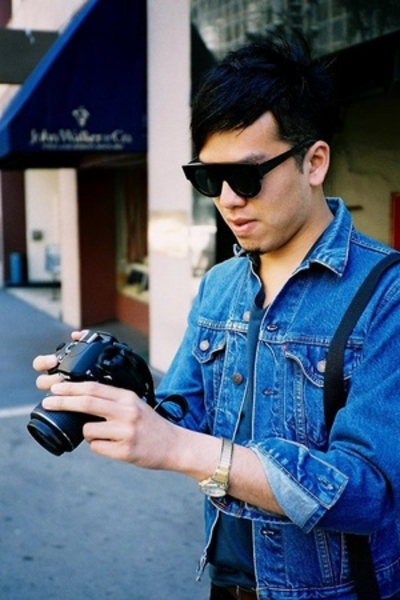

'http://www.chictopia.com/photo/show/16781'

['jacket', 'jeans', 'shirt', 'sunglasses']

In [167]:
# id
sample[0][0, 0]

# url
from IPython.display import Image
sample[1][0]
Image(sample[1][0])

# post_url
sample[2][0]

# tags
ids = sample[3][0]
sr_ctg[ids].tolist()

In [198]:
from tqdm import tqdm

d = [{
    "snap_id": int(sample[0][0, 0]),
    "snap_url": sample[1][0],
    "post_url": sample[2][0],
    "items": [
        {
            "category_id": int(tag_id),
            "category":tag
        } 
        for tag_id, tag
        in list(zip(
            sample[3][0].tolist(),
            sr_ctg[sample[3][0]].tolist(),
        ))
    ]
} for sample in tqdm(samples[:10])]



  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 1240.55it/s]

In [199]:
import json

df = pd.DataFrame(d)
df

# save
#out_file = './test_label/paperdoll.json'
#out_dir = os.path.dirname(out_file)
#if not os.path.isdir(out_dir):
#    os.makedirs(out_dir)
#with open(out_file, 'w') as f:
#    json.dump(d,
#              f, indent=4)

,items,post_url,snap_id,snap_url
0,"[{'category_id': 22, 'category': 'jacket'}, {'...",http://www.chictopia.com/photo/show/16781,10,http://images1.chictopia.com/photos/homme/5747...
1,"[{'category_id': 22, 'category': 'jacket'}, {'...",http://www.chictopia.com/photo/show/9833,15,http://images2.chictopia.com/photos/homme/4228...
2,"[{'category_id': 35, 'category': 'shirt'}]",http://www.chictopia.com/photo/show/7413,18,http://images3.chictopia.com/photos/homme/4923...
3,"[{'category_id': 4, 'category': 'blazer'}, {'c...",http://www.chictopia.com/photo/show/1382,27,http://images0.chictopia.com/photos/homme/3485...
4,"[{'category_id': 36, 'category': 'shoes'}, {'c...",http://www.chictopia.com/photo/show/2841,32,http://images1.chictopia.com/photos/thefashbot...
5,"[{'category_id': 22, 'category': 'jacket'}, {'...",http://www.chictopia.com/photo/show/858,35,http://images2.chictopia.com/photos/homme/1025...
6,"[{'category_id': 32, 'category': 'romper'}, {'...",http://www.chictopia.com/photo/show/3198,47,http://images3.chictopia.com/photos/thefashbot...
7,"[{'category_id': 15, 'category': 'earrings'}, ...",http://www.chictopia.com/photo/show/3197,49,http://images0.chictopia.com/photos/thefashbot...
8,"[{'category_id': 28, 'category': 'pants'}, {'c...",http://www.chictopia.com/photo/show/74064,50,http://images1.chictopia.com/photos/Luxenoir/7...
9,"[{'category_id': 3, 'category': 'belt'}, {'cat...",http://www.chictopia.com/photo/show/2972,54,http://images2.chictopia.com/photos/thefashbot...


# mat2json Fashionista  v0.2

In [19]:
mat_file = './data/fashionista_v0.2.mat'
#f = h5py.File(mat_file, 'r')
f = loadmat(mat_file)
list(f.keys())

['__header__',
 '__version__',
 '__globals__',
 'test_index',
 'truths',
 'predictions']

In [76]:
test_index = f['test_index']
truths = f['truths']
predictions = f['predictions']

In [77]:
type(test_index)
test_index.shape
test_index = test_index[0]

numpy.ndarray

(1, 229)

In [78]:
type(test_index[0])
test_index

numpy.uint16

array([  1,   4,   7,  10,  13,  16,  19,  22,  25,  28,  31,  34,  37,
        40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  73,  76,
        79,  82,  85,  88,  91,  94,  97, 100, 103, 106, 109, 112, 115,
       118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154,
       157, 160, 163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193,
       196, 199, 202, 205, 208, 211, 214, 217, 220, 223, 226, 229, 232,
       235, 238, 241, 244, 247, 250, 253, 256, 259, 262, 265, 268, 271,
       274, 277, 280, 283, 286, 289, 292, 295, 298, 301, 304, 307, 310,
       313, 316, 319, 322, 325, 328, 331, 334, 337, 340, 343, 346, 349,
       352, 355, 358, 361, 364, 367, 370, 373, 376, 379, 382, 385, 388,
       391, 394, 397, 400, 403, 406, 409, 412, 415, 418, 421, 424, 427,
       430, 433, 436, 439, 442, 445, 448, 451, 454, 457, 460, 463, 466,
       469, 472, 475, 478, 481, 484, 487, 490, 493, 496, 499, 502, 505,
       508, 511, 514, 517, 520, 523, 526, 529, 532, 535, 538, 54

In [80]:
truths = f['truths']
type(truths)
truths.shape
truths = truths[0]

numpy.ndarray

(1, 685)

In [81]:
type(truths[0])
len(truths[0])
truth = truths[0]

# index
truth[0][0]

numpy.void

6

array([1], dtype=uint8)

In [82]:
# url
truth[1][0]

'http://assets0.chictopia.com/photos/thehautepursuit/7163932753/blue-diy-miu-miu-tights-blue-levis-shorts-blue-forever21-blazer-white-alex_400.jpg'

In [85]:
# JPEG encoded image
truth[2].shape

(39886, 1)

In [86]:
# pose
truth[3][0,0][0].shape
truth[3][0,0][0]

(14, 2)

array([[172, 523],
       [165, 411],
       [161, 310],
       [217, 309],
       [213, 405],
       [212, 522],
       [117, 312],
       [117, 210],
       [129, 121],
       [239, 127],
       [254, 201],
       [212, 265],
       [196, 106],
       [203,  27]], dtype=uint16)

In [97]:
# annotation
len(truth[4][0,0])
truth[4][0,0][0].shape
truth[4][0,0][1].shape
truth[4][0,0][2].shape
truth[4][0,0][3]

4

(1, 10656)

(323, 1)

(56, 1)

array([], shape=(0, 0), dtype=uint8)